<a href="https://colab.research.google.com/github/yaicianis/yaicianis-Dog-vs-Cat-Classification-using-Transfer-Learning/blob/main/Dog_vs_Cat_Classification_using_Transfer_Learning_MobileNet_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [2]:
# installing the Kaggle library
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from kaggle


In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:08<00:00, 92.2MB/s]
100% 812M/812M [00:08<00:00, 106MB/s] 


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folder
path,dirs,files= next(os.walk('/content/train'))
file_count=len(files)
print('number of images',file_count)

number of images 25000


printing the name of images

In [9]:
file_name=os.listdir('/content/train')
print(file_name)

['cat.4554.jpg', 'dog.10336.jpg', 'dog.6151.jpg', 'dog.5083.jpg', 'cat.4657.jpg', 'dog.6698.jpg', 'cat.5727.jpg', 'cat.6846.jpg', 'dog.486.jpg', 'dog.10724.jpg', 'cat.7566.jpg', 'cat.10200.jpg', 'dog.4066.jpg', 'dog.9343.jpg', 'cat.3997.jpg', 'dog.9354.jpg', 'dog.4416.jpg', 'cat.11766.jpg', 'cat.1670.jpg', 'dog.3935.jpg', 'dog.7026.jpg', 'cat.1507.jpg', 'dog.8613.jpg', 'cat.10814.jpg', 'dog.5392.jpg', 'cat.1582.jpg', 'dog.6179.jpg', 'dog.5085.jpg', 'dog.10973.jpg', 'cat.4108.jpg', 'dog.1150.jpg', 'cat.7092.jpg', 'dog.1083.jpg', 'dog.8447.jpg', 'cat.9303.jpg', 'dog.9520.jpg', 'dog.10554.jpg', 'cat.6272.jpg', 'cat.8338.jpg', 'dog.11604.jpg', 'dog.11813.jpg', 'dog.1047.jpg', 'cat.5457.jpg', 'dog.1924.jpg', 'dog.4666.jpg', 'dog.389.jpg', 'cat.3319.jpg', 'cat.69.jpg', 'cat.5835.jpg', 'dog.234.jpg', 'dog.6137.jpg', 'dog.10999.jpg', 'cat.5323.jpg', 'dog.8379.jpg', 'cat.701.jpg', 'dog.5599.jpg', 'dog.6614.jpg', 'dog.540.jpg', 'dog.2936.jpg', 'dog.625.jpg', 'dog.8862.jpg', 'cat.86.jpg', 'cat.29

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


displaying the images of dogs and cats

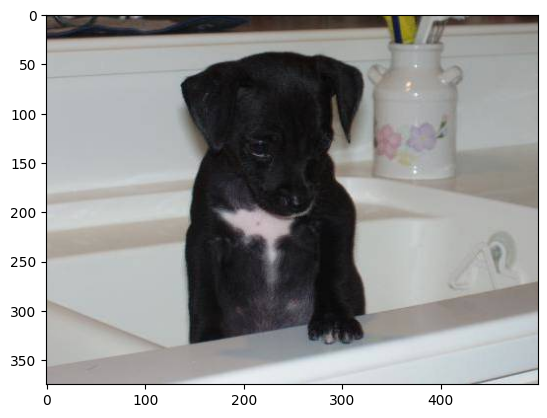

In [11]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
plt.imshow(img)

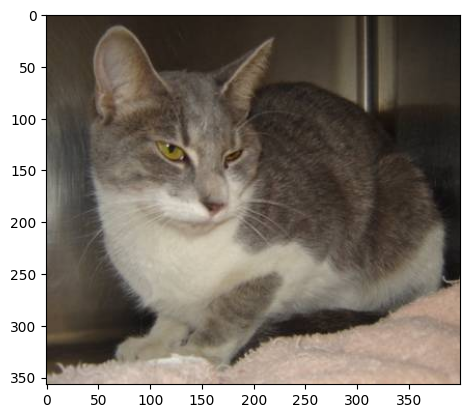

In [12]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
plt.imshow(img)

In [13]:
file_name=os.listdir('/content/train')

dog_count=0
cat_count=0

for img_file in file_name:

  name=img_file[0:3]

  if name=='dog':
    dog_count +=1

  else:
     cat_count +=1

print('number of dog images =',dog_count)
print('number of cat images =',cat_count)

number of dog images = 12500
number of cat images = 12500


resizing all the images

In [14]:
# creating directory for resized images
os.mkdir('/content/image resized')

In [15]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(2000):

  filename=os.listdir(original_folder)[i]
  img_path =original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)



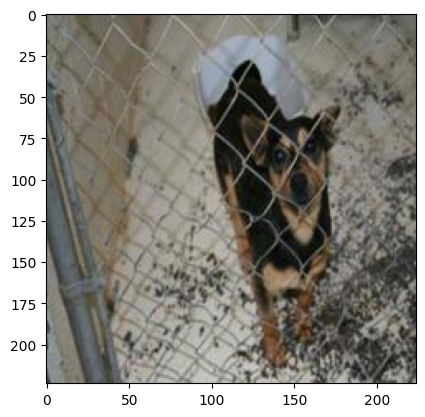

In [16]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10046.jpg')
imgplt=plt.imshow(img)
plt.show()

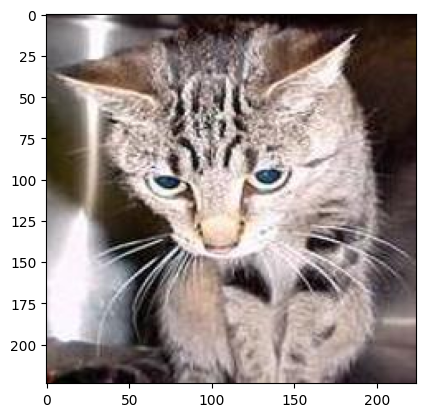

In [17]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10016.jpg')
imgplt=plt.imshow(img)
plt.show()

creating labels for resized images of dogs and cats

cat-->0
dog-->1

In [22]:
# creating for loop to assign labels
filenames=os.listdir('/content/image resized/')

labels=[]

for i in range(2000):

  file_name=filenames[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)

  else:
       labels.append(0)




In [23]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 0]
2000


In [24]:
#couting the images of dogs and cats out of 2000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 979 1021]


converting all the reseized images to numpy arrays

In [25]:
import cv2
import glob

In [41]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [42]:
print(dog_cat_images)

[[[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  ...

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]]


 [[[ 42 179 171]
   [ 47 184 176]
   [ 55 192 184]
   ...
   [110 209 213]
   [107 206 210]
   [124 223 227]]

  [[ 51 188 180]
   [ 55 192 184]
   [ 61 198 190]
   ...
   [117 216 220]
   [108 207 211]
   [116 215 219]]

  [[ 59 196 188]
   [ 62 199 191]
   [ 65 202 194]
   ...
   [114 214 219]
   [103 203 208]
   [102 202

In [43]:
type(dog_cat_images)

numpy.ndarray

In [44]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)
